In [1]:
import pandas as pd

# Load the dataset
file_path = r'C:\Users\hrith\Downloads\apps.csv'
df = pd.read_csv(file_path)

# View first few rows and check data types
print(df.head())
print(df.info())

# Drop duplicates and handle missing values
df = df.drop_duplicates()
df = df.dropna(subset=['Rating', 'Reviews', 'Category'])  # Ensure key columns have no missing values

# Convert data types
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)
df['Price'] = df['Price'].str.replace('$', '').astype(float)

print(df.info())  # Confirm data types are fixed


   Unnamed: 0                                                App  \
0           0     Photo Editor & Candy Camera & Grid & ScrapBook   
1           1                                Coloring book moana   
2           2  U Launcher Lite – FREE Live Cool Themes, Hide ...   
3           3                              Sketch - Draw & Paint   
4           4              Pixel Draw - Number Art Coloring Book   

         Category  Rating  Reviews  Size     Installs  Type Price  \
0  ART_AND_DESIGN     4.1      159  19.0      10,000+  Free     0   
1  ART_AND_DESIGN     3.9      967  14.0     500,000+  Free     0   
2  ART_AND_DESIGN     4.7    87510   8.7   5,000,000+  Free     0   
3  ART_AND_DESIGN     4.5   215644  25.0  50,000,000+  Free     0   
4  ART_AND_DESIGN     4.3      967   2.8     100,000+  Free     0   

  Content Rating                     Genres      Last Updated  \
0       Everyone               Art & Design   January 7, 2018   
1       Everyone  Art & Design;Pretend Play  J

C:\Users\hrith\AppData\Local\Temp\ipykernel_22136\2217206727.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')


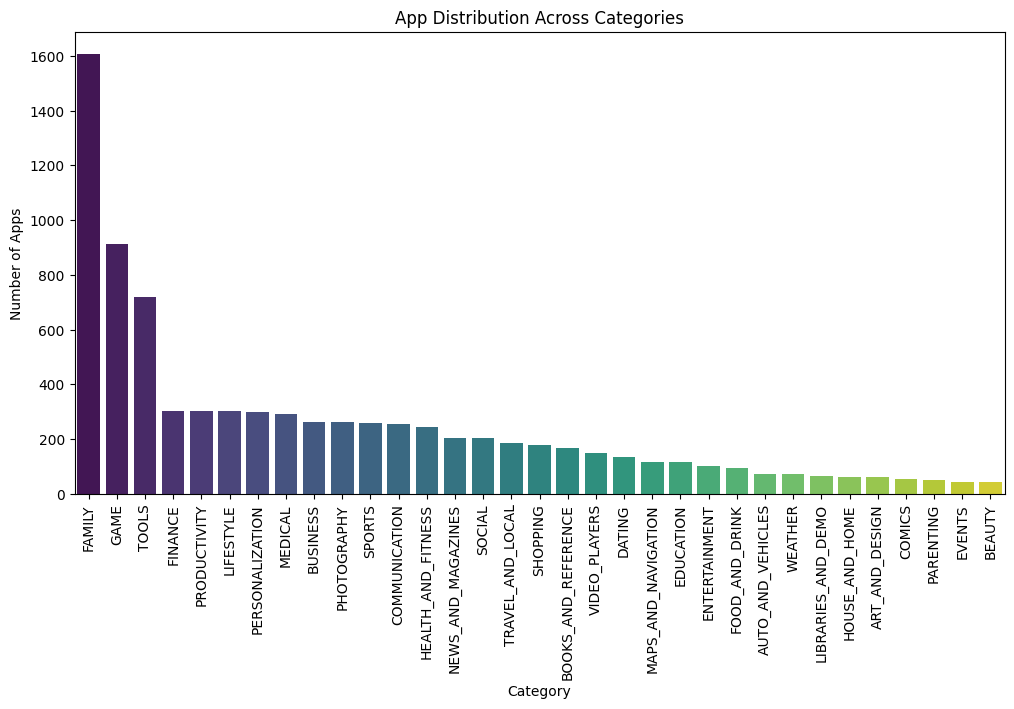

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of apps in each category
category_counts = df['Category'].value_counts()

# Plot the distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.title('App Distribution Across Categories')
plt.xlabel('Category')
plt.ylabel('Number of Apps')
plt.show()


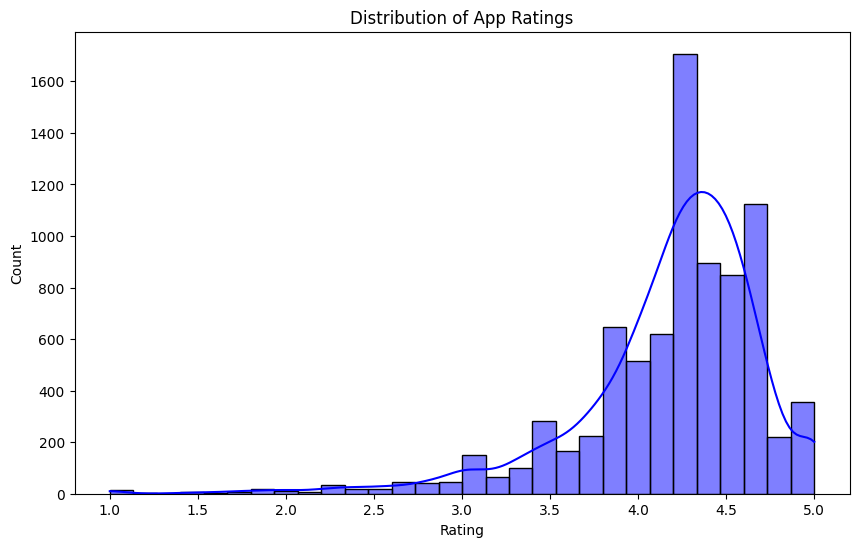

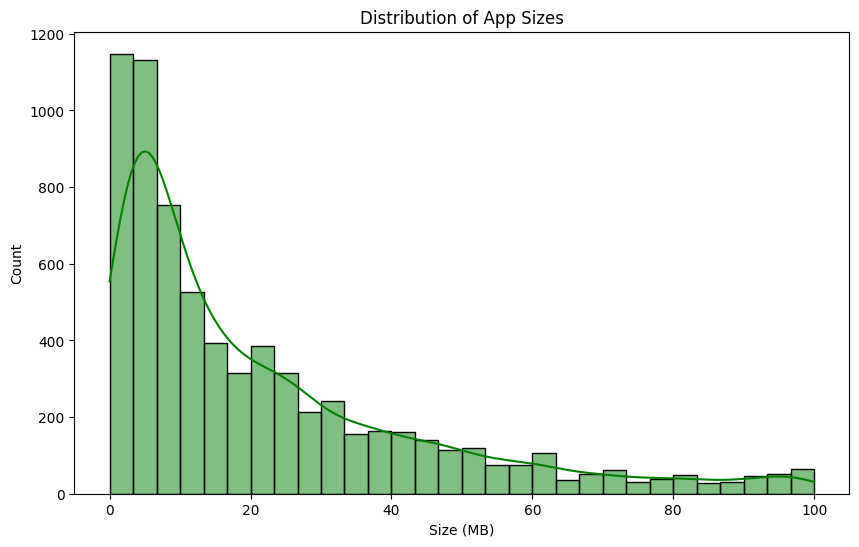

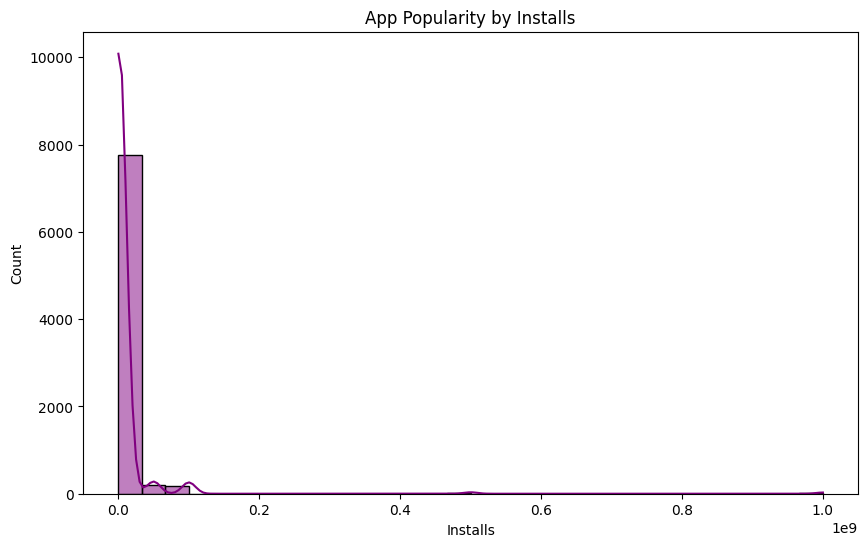

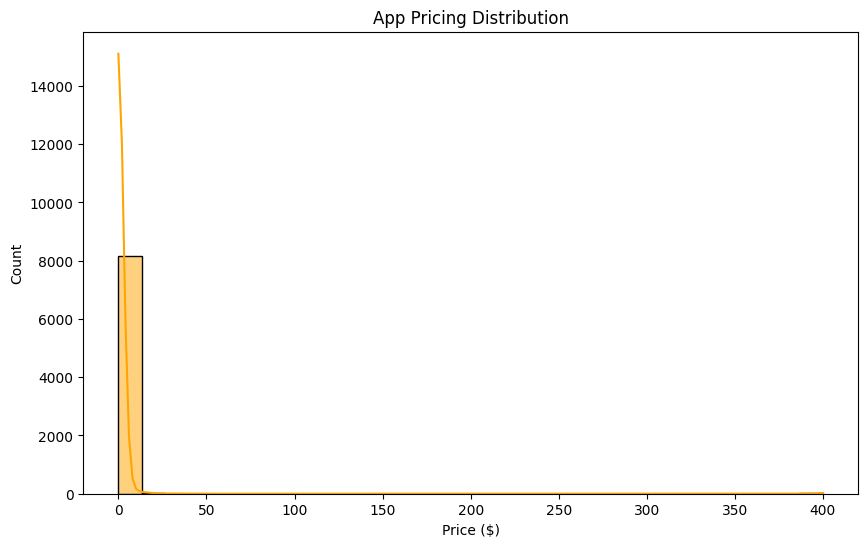

In [3]:
# Rating distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='blue')
plt.title('Distribution of App Ratings')
plt.xlabel('Rating')
plt.show()

# App size distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Size'], bins=30, kde=True, color='green')
plt.title('Distribution of App Sizes')
plt.xlabel('Size (MB)')
plt.show()

# Popularity by installs
plt.figure(figsize=(10, 6))
sns.histplot(df['Installs'], bins=30, kde=True, color='purple')
plt.title('App Popularity by Installs')
plt.xlabel('Installs')
plt.show()

# Price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=30, kde=True, color='orange')
plt.title('App Pricing Distribution')
plt.xlabel('Price ($)')
plt.show()


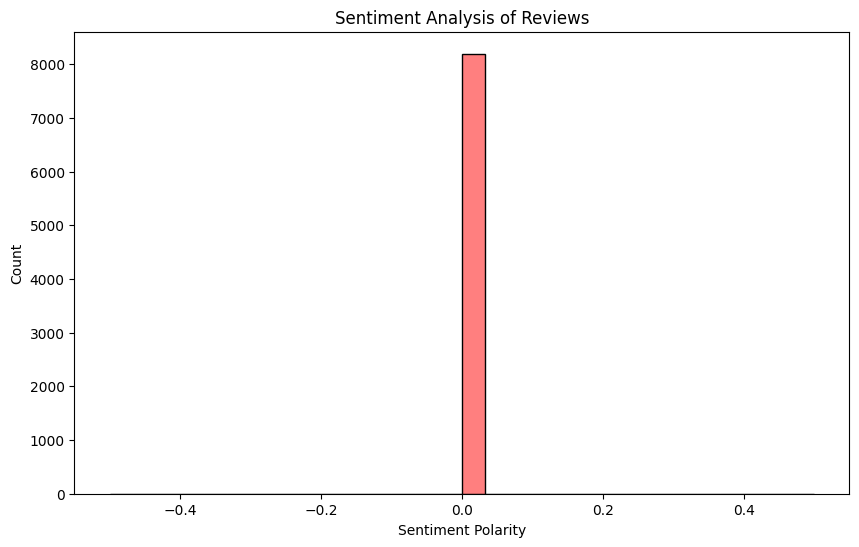

In [6]:
from textblob import TextBlob

# Sentiment analysis on reviews (assuming a "Reviews" text column exists)
df['Sentiment'] = df['Reviews'].apply(lambda review: TextBlob(str(review)).sentiment.polarity)

# Visualize the sentiment polarity distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=30, kde=True, color='red')
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment Polarity')
plt.show()


In [5]:
pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 626.3/626.3 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


C:\Users\hrith\AppData\Local\Temp\ipykernel_22136\1345674759.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




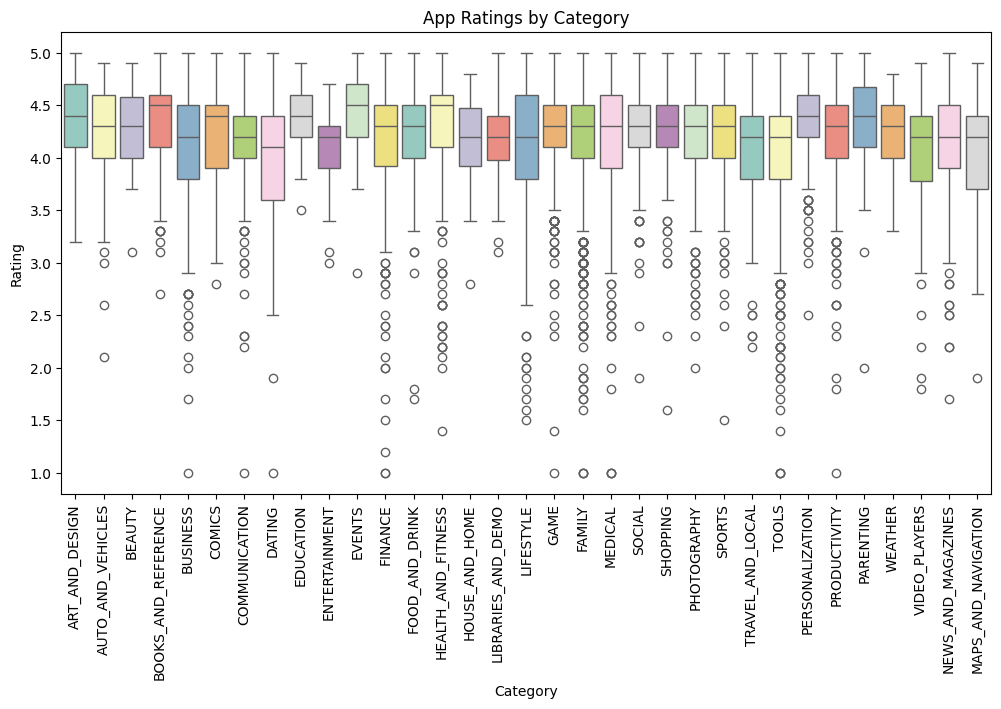

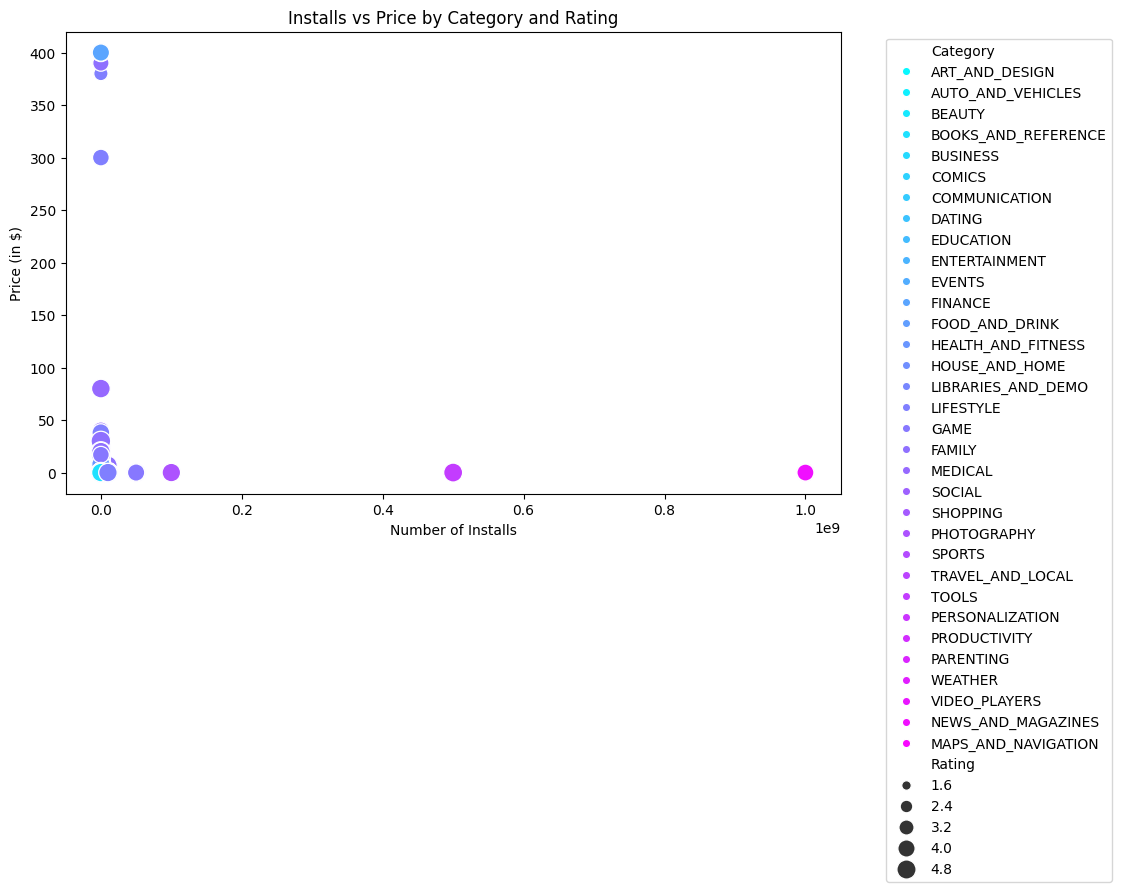

In [8]:
# Box plot for app ratings across different categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df, palette='Set3')
plt.xticks(rotation=90)
plt.title('App Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')
plt.show()

# Scatter plot for installs vs price, colored by category and sized by ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Installs', y='Price', hue='Category', size='Rating', data=df, palette='cool', sizes=(20, 200))
plt.title('Installs vs Price by Category and Rating')
plt.xlabel('Number of Installs')
plt.ylabel('Price (in $)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
